# Exercise 5

In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data():
    """for ex5
    d['X'] shape = (12, 1)
    pandas has trouble taking this 2d ndarray to construct a dataframe, so I ravel
    the results
    """
    d = sio.loadmat('ex5data1.mat')
    return map(np.ravel, [d['X'], d['y'], d['Xval'], d['yval'], d['Xtest'], d['ytest']])

In [3]:
X, y, Xval, yval, Xtest, ytest = load_data()

D:\Application\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


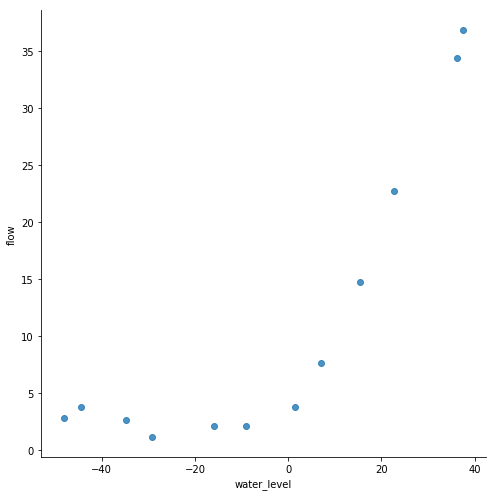

In [4]:
df = pd.DataFrame({'water_level':X, 'flow':y})

sns.lmplot('water_level', 'flow', data=df, fit_reg=False, size=7)
plt.show()

In [5]:
X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]

In [6]:
def cost(theta, X, y, reg):
    """
    X: R(m*n), m records, n features
    y: R(m)
    theta : R(n), linear regression parameters
    """
    m = X.shape[0]

    temp = X @ theta - y

    square_sum = temp.T @ temp
    cost = (square_sum + reg * theta.T @ theta) / (2 * m)

    return cost

In [7]:
theta = np.ones(X.shape[1])
cost(theta, X, y, 0.5)

303.9931922202643

In [8]:
def gradient(theta, X, y, reg):
    m = X.shape[0]

    temp = X.T @ (X @ theta - y)  # (m,n).T @ (m, 1) -> (n, 1)
    temp[1:] += theta[1:] * reg
    
    return temp / m

In [9]:
def linear_regression_np(X, y, l=1):
    """linear regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization

    return: trained parameters
    """
    # init theta
    theta = np.ones(X.shape[1])

    # train it
    res = opt.minimize(fun=cost,
                       x0=theta,
                       args=(X, y, l),
                       method='TNC',
                       jac=gradient,
                       options={'disp': True})
    return res


In [10]:
theta = np.ones(X.shape[0])

final_theta = linear_regression_np(X, y, 0).get('x')

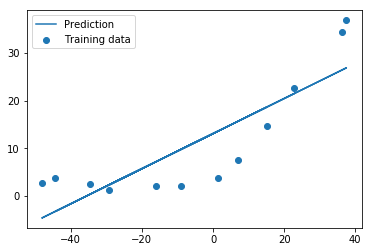

In [11]:
b = final_theta[0] # intercept
m = final_theta[1] # slope

plt.scatter(X[:,1], y, label="Training data")
plt.plot(X[:, 1], X[:, 1]*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()

In [12]:
training_cost, vc_cost = [], []

In [13]:
m = X.shape[0]
for i in range(1, m+1):
#     print('i={}'.format(i))
    res = linear_regression_np(X[:i, :], y[:i], 0)
    
    tc = cost(res.x, X[:i, :], y[:i], 0)
    vc = cost(res.x, Xval, yval, 0)
#     print('tc={}, cv={}'.format(tc, cv))
    
    training_cost.append(tc)
    vc_cost.append(vc)

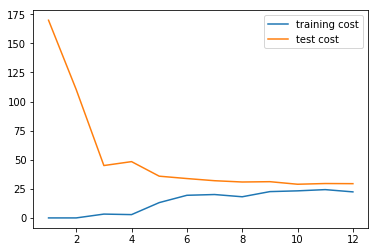

In [14]:
plt.plot(np.arange(1, m+1), training_cost, label='training cost')
plt.plot(np.arange(1, m+1), vc_cost, label='test cost')
plt.legend(loc=1)
plt.show()

In [15]:
def prepare_poly_data(*args, power):
    """
    args: keep feeding in X, Xval, or Xtest
        will return in the same order
    """
    def prepare(x):
        # expand feature
        df = poly_features(x, power=power)

        # normalization
        ndarr = normalize_feature(df).as_matrix()

        # add intercept term
        return np.insert(ndarr, 0, np.ones(ndarr.shape[0]), axis=1)

    return [prepare(x) for x in args]

In [16]:
def poly_features(x, power, as_ndarray=False):
    data = {'f{}'.format(i): np.power(x, i) for i in range(1, power + 1)}
    df = pd.DataFrame(data)

    return df.as_matrix() if as_ndarray else df


In [17]:
X, y, Xval, yval, Xtest, ytest = load_data()

In [18]:
poly_features(X, power=3)

,f1,f2,f3
0,-15.936758,253.980260,-4047.621971
1,-29.152979,849.896197,-24777.006175
2,36.189549,1309.683430,47396.852168
3,37.492187,1405.664111,52701.422173
4,-48.058829,2309.651088,-110999.127750
5,-8.941458,79.949670,-714.866612
6,15.307793,234.328523,3587.052500
7,-34.706266,1204.524887,-41804.560890
8,1.389154,1.929750,2.680720
9,-44.383760,1969.918139,-87432.373590


# Polynomial Feature Mapping

In [19]:
def normalize_feature(df):
    """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [20]:
X_poly, Xval_poly, Xtest_poly= prepare_poly_data(X, Xval, Xtest, power=8)
X_poly[:3, :]

D:\Application\Anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01]])

In [21]:
def plot_learning_curve(X, y, Xval, yval, l=0):
    training_cost, vc_cost = [], []
    m = X.shape[0]

    for i in range(1, m + 1):
        # regularization applies here for fitting parameters
        res = linear_regression_np(X[:i, :], y[:i], l=l)

        # remember, when you compute the cost here, you are computing
        # non-regularized cost. Regularization is used to fit parameters only
        tc = cost(res.x, X[:i, :], y[:i], 0)
        vc = cost(res.x, Xval, yval, 0)

        training_cost.append(tc)
        vc_cost.append(vc)

    plt.plot(np.arange(1, m + 1), training_cost, label='training cost')
    plt.plot(np.arange(1, m + 1), vc_cost, label='cv cost')
    plt.legend(loc=1)


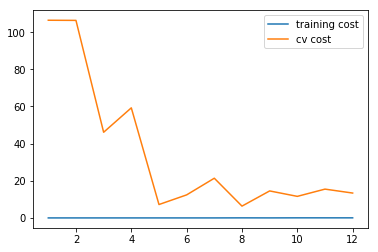

In [22]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=0)
plt.show()

### try $\lambda=1$

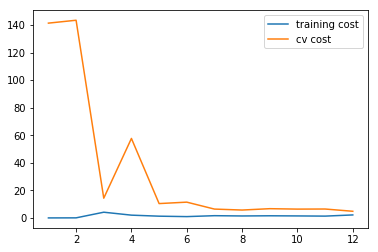

In [23]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=1)
plt.show()


训练代价增加了些，不再是0了。
也就是说我们减轻**过拟合**

### try $\lambda=100$

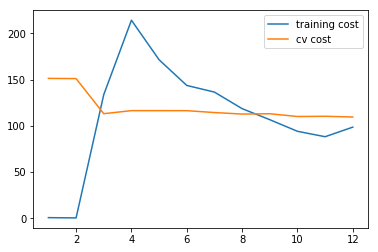

In [24]:
plot_learning_curve(X_poly, y, Xval_poly, yval, l=100)
plt.show()

### 找到最佳的 $\lambda$

In [25]:
l_candidate = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
training_cost, vc_cost = [], []

In [26]:
for l in l_candidate:
    res = linear_regression_np(X_poly, y, l)
    
    tc = cost(res.x, X_poly, y, 0)
    vc = cost(res.x, Xval_poly, yval, 0)
    
    training_cost.append(tc)
    vc_cost.append(vc)

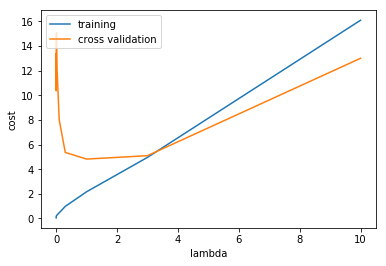

In [27]:
plt.plot(l_candidate, training_cost, label='training')
plt.plot(l_candidate, vc_cost, label='cross validation')
plt.legend(loc=2)

plt.xlabel('lambda')

plt.ylabel('cost')
plt.show()

In [28]:
# best cv I got from all those candidates
l_candidate[np.argmin(vc_cost)]

1

In [29]:
# use test data to compute the cost
for l in l_candidate:
    theta = linear_regression_np(X_poly, y, l).x
    print('test cost(l={}) = {}'.format(l, cost(theta, Xtest_poly, ytest, 0)))

test cost(l=0) = 10.122298845834932
test cost(l=0.001) = 11.011965702383696
test cost(l=0.003) = 11.218649208477647
test cost(l=0.01) = 10.881250636316798
test cost(l=0.03) = 10.027721654705763
test cost(l=0.1) = 8.63224761589424
test cost(l=0.3) = 7.619757178732219
test cost(l=1) = 7.662741826583779
test cost(l=3) = 11.79267416237762
test cost(l=10) = 27.7203438309902


调参后， $\lambda = 0.3$ 是最优选择，这个时候测试代价最小